In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#df = pd.read_csv("te.csv")
df = pd.read_csv('atte.csv', index_col=0)
#df = pd.concat([df,adf], ignore_index=True)

In [3]:
df

,year,games,rec,yds,tgtsh,ctr,tds,st,age,school,...,college_dom,college_tgts,breakout_age,40,speed,burst,agility,catch,peakPPG,name
0,2015.0,9,19,318,-,-,7,0,20,Oklahoma,...,18.0%,15.5,--,4.67,108.5,110.8,11.72,9.95,17.7,Mark Andrews
1,2016.0,12,31,489,-,-,7,0,21,Oklahoma,...,18.0%,15.5,--,4.67,108.5,110.8,11.72,9.95,17.7,Mark Andrews
2,2017.0,14,62,958,-,-,8,0,22,Oklahoma,...,18.0%,15.5,--,4.67,108.5,110.8,11.72,9.95,17.7,Mark Andrews
0,2018.0,8,13,174,4.4%,72.2%,3,-,19,Washington,...,31.8%,11.6,21.4,4.78,94.6,NaN,NaN,NaN,8.1,Cade Otton
1,2019.0,11,32,344,10.5%,74.4%,2,-,20,Washington,...,31.8%,11.6,21.4,4.78,94.6,NaN,NaN,NaN,8.1,Cade Otton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2018.0,9,47,635,16.2%,69.1%,2,0,21,Stanford,...,16.7%,15.8,--,4.92,87.7,110.0,11.55,9.88,2.0,Kaden Smith
0,2013.0,1,0,0,-,-,0,0,19,Toledo,...,23.7%,11.8,22.3,4.86,96.3,107.5,11.56,9.82,4.6,Michael Roberts
1,2014.0,2,4,65,-,-,2,0,20,Toledo,...,23.7%,11.8,22.3,4.86,96.3,107.5,11.56,9.82,4.6,Michael Roberts
2,2015.0,11,21,234,-,-,4,0,21,Toledo,...,23.7%,11.8,22.3,4.86,96.3,107.5,11.56,9.82,4.6,Michael Roberts


In [4]:
for col in ['tgtsh', 'ctr', 'college_dom']:
    df.loc[df[col]!='-',col] = df.loc[df[col]!='-', col].str.strip('%').astype('float')/100
df['college_tgts'] = df['college_tgts']/100

In [5]:
def simple_draft(draft):
    if draft == None:
        return None
    return((int(draft.split('.')[0]) - 1) * 32) + int(draft.split('.')[1])
df.loc[df['draft']=='Undrafted','draft'] = None
df['ovr_pick'] = df['draft'].apply(simple_draft)

In [6]:
df = df.replace('-', None)
df = df.replace('--', None)
df = df.astype({'games': 'Int64', 'rec': 'Int64', 
                'yds': 'Int64', 'tds': 'Int64', 'st': 'Int64',
               'age': 'Int64', 'tgtsh': 'Float64', 'ctr': 'Float64'})

In [7]:
df.loc[df['breakout_age'].isin(['', '--', '-']),'breakout_age'] = np.nan
df['breakout_age'] = df['breakout_age'].astype(float)

In [8]:
print(df.dtypes)

year            float64
games             Int64
rec               Int64
yds               Int64
tgtsh           Float64
ctr             Float64
tds               Int64
st                Int64
age               Int64
school           object
draft            object
age.1           float64
college_dom     float64
college_tgts    float64
breakout_age    float64
40              float64
speed           float64
burst           float64
agility         float64
catch           float64
peakPPG         float64
name             object
ovr_pick        float64
dtype: object


In [9]:
df

,year,games,rec,yds,tgtsh,ctr,tds,st,age,school,...,college_tgts,breakout_age,40,speed,burst,agility,catch,peakPPG,name,ovr_pick
0,2015.0,9,19,318,<NA>,<NA>,7,0,20,Oklahoma,...,0.155,NaN,4.67,108.5,110.8,11.72,9.95,17.7,Mark Andrews,86.0
1,2016.0,12,31,489,<NA>,<NA>,7,0,21,Oklahoma,...,0.155,NaN,4.67,108.5,110.8,11.72,9.95,17.7,Mark Andrews,86.0
2,2017.0,14,62,958,<NA>,<NA>,8,0,22,Oklahoma,...,0.155,NaN,4.67,108.5,110.8,11.72,9.95,17.7,Mark Andrews,86.0
0,2018.0,8,13,174,0.044,0.722,3,<NA>,19,Washington,...,0.116,21.4,4.78,94.6,NaN,NaN,NaN,8.1,Cade Otton,97.0
1,2019.0,11,32,344,0.105,0.744,2,<NA>,20,Washington,...,0.116,21.4,4.78,94.6,NaN,NaN,NaN,8.1,Cade Otton,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2018.0,9,47,635,0.162,0.691,2,0,21,Stanford,...,0.158,NaN,4.92,87.7,110.0,11.55,9.88,2.0,Kaden Smith,163.0
0,2013.0,1,0,0,<NA>,<NA>,0,0,19,Toledo,...,0.118,22.3,4.86,96.3,107.5,11.56,9.82,4.6,Michael Roberts,117.0
1,2014.0,2,4,65,<NA>,<NA>,2,0,20,Toledo,...,0.118,22.3,4.86,96.3,107.5,11.56,9.82,4.6,Michael Roberts,117.0
2,2015.0,11,21,234,<NA>,<NA>,4,0,21,Toledo,...,0.118,22.3,4.86,96.3,107.5,11.56,9.82,4.6,Michael Roberts,117.0


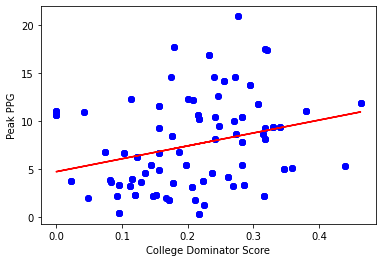

In [10]:
x = df['college_dom']
y = df['peakPPG']
m, b = np.polyfit(x, y, 1)
best_fit = m * x + b
plt.scatter(x,y,color='blue')
plt.plot(x, best_fit, color='red')
plt.xlabel('College Dominator Score')
plt.ylabel('Peak PPG')
plt.show()

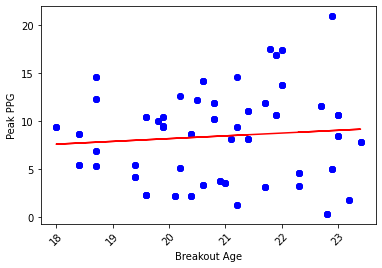

In [11]:
x = df[df['breakout_age'].notna()]['breakout_age']
y = df[df['breakout_age'].notna()]['peakPPG']
m, b = np.polyfit(x, y, 1)
best_fit = m * x + b
plt.scatter(x,y,color='blue')
plt.plot(x, best_fit, color='red')
plt.xticks(rotation=45)
plt.xlabel('Breakout Age')
plt.ylabel('Peak PPG')
plt.show()

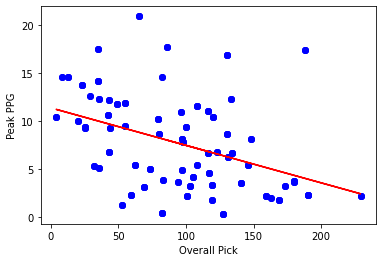

In [12]:
x = df[df['ovr_pick'].notna()]['ovr_pick']
y = df[df['ovr_pick'].notna()]['peakPPG']
m, b = np.polyfit(x, y, 1)
best_fit = m * x + b
plt.scatter(x,y,color='blue')
plt.plot(x, best_fit, color='red')
plt.xlabel('Overall Pick')
plt.ylabel('Peak PPG')
plt.show()

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance

In [14]:
X = df.drop(columns=['peakPPG','draft','age.1', 'name', 'school', 'year'])
y = df['peakPPG']
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, 
    test_size=.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, 
    test_size=.5, random_state=0)

In [15]:
X_valid

,games,rec,yds,tgtsh,ctr,tds,st,age,college_dom,college_tgts,breakout_age,40,speed,burst,agility,catch,ovr_pick
0,9,29,415,<NA>,<NA>,11,0,19,0.283,0.130,19.4,4.49,129.6,NaN,NaN,NaN,108.0
3,12,59,704,0.191,0.702,2,0,22,0.224,0.115,20.9,4.54,108.6,124.3,NaN,10.08,180.0
0,10,12,135,<NA>,<NA>,0,0,22,0.282,0.131,23.4,4.84,89.1,122.3,11.67,9.93,98.0
1,10,32,408,<NA>,<NA>,5,0,19,0.262,0.141,19.4,4.73,97.9,111.9,11.78,9.87,105.0
0,6,15,188,0.051,0.714,0,0,18,0.255,0.120,20.6,4.59,108.4,122.8,11.16,10.15,35.0
3,8,27,348,<NA>,<NA>,3,0,22,0.217,0.124,20.8,4.69,105.8,120.5,11.37,10.11,79.0
0,1,1,13,0.002,1.0,0,0,18,0.147,0.118,20.1,4.77,97.3,NaN,NaN,NaN,101.0
1,10,27,346,<NA>,<NA>,4,0,20,0.318,0.130,21.8,4.76,97.8,119.1,11.55,10.04,35.0
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,21,0.211,0.140,23.2,4.65,105.1,118.9,NaN,10.06,119.0
2,5,13,151,0.076,0.765,5,0,20,0.147,0.118,20.1,4.77,97.3,NaN,NaN,NaN,101.0


In [16]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'eta': 0.1,
    'eval_metric': 'rmse'
}
num_round = 100
bst = xgb.train(params, dtrain, num_round)
y_pred = bst.predict(dvalid)
mse = mean_squared_error(y_valid, y_pred)
print(f'Mean squared error: {mse}')

Mean squared error: 3.4196455460716897


In [17]:
sum(abs(bst.predict(dtest) - y_test) < 0.5) / len(y_test)

0.6296296296296297

In [18]:
sum(abs(bst.predict(dtest) - y_test) < 1) / len(y_test)

0.7777777777777778

In [19]:
sum(abs(bst.predict(dtest) - y_test) < 2) / len(y_test)

0.9259259259259259

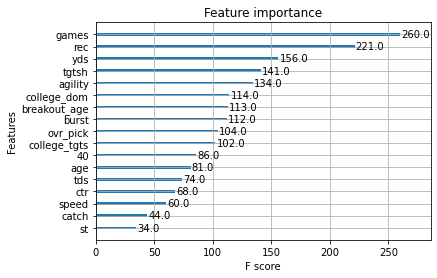

In [20]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
xgb.plot_importance(model)
plt.show()

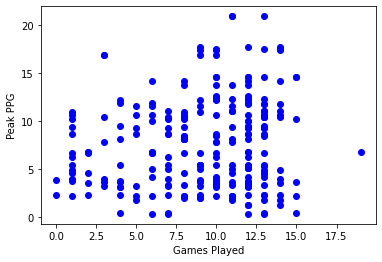

In [21]:
x = df[df['games'].notna()]['games']
y = df[df['games'].notna()]['peakPPG']
plt.scatter(x,y,color='blue')
plt.xlabel('Games Played')
plt.ylabel('Peak PPG')
plt.show()

In [22]:
X = df.drop(columns=['peakPPG','draft','age.1', 'name', 'school', 'year','games'])
y = df['peakPPG']
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, 
    test_size=.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, 
    test_size=.5, random_state=0)

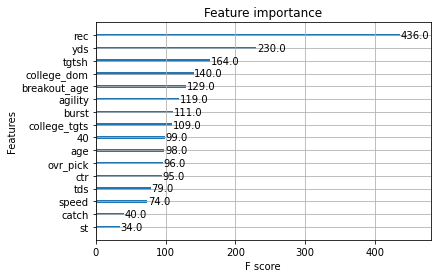

In [23]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
xgb.plot_importance(model)
plt.show()

In [24]:
sum(abs(model.predict(X_test) - y_test.values) < 0.5) / len(X_test)

0.48148148148148145

In [25]:
sum(abs(model.predict(X_test) - y_test.values) < 1) / len(X_test)

0.6296296296296297

In [26]:
sum(abs(model.predict(X_test) - y_test.values) < 2) / len(X_test)

0.8518518518518519

In [27]:
test = xgb.DMatrix(df[df['name'] == 'Sam LaPorta'].drop(columns=['peakPPG','draft','age.1', 'name', 'school', 'year']))
bst.predict(test)

array([14.075495, 14.082361, 14.028096, 14.049843], dtype=float32)

ValueError: DataFrame constructor not properly called!